In [15]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from statsmodels.robust.scale import huber
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import re
import locale
plt.style.use('seaborn')
%matplotlib inline

pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)



df_indicadores_pob = pd.read_parquet(f'../data/processed/df_indicadores_pob.parquet')

df_final_pob = pd.read_parquet('../data/processed/df_final_pob.parquet')


In [16]:
pd.set_option('display.max_rows', 0)

df_final_pob



,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,Abastecimiento de agua potable,"Abastos, mercados, lonjas",Acceso a los núcleos de población,Actividades funerarias,Alcantarillado,Alumbrado público,Biblioteca pública,Cementerio,Comercio ambulante,Conservación y rehabilitación de la edificación,"Conservación, mantenimiento y vigilancia de los edificios destinados a educación",Cooperar con las Administraciones educativas en la obtención de solares,Equipamientos culturales,Evacuación y tratamiento de aguas residuales,Ferias,Información y promoción de la actividad turística de interés y ámbito local,Infraestructura viaria y otros equipamientos de titularidad de la entidad local,Instalaciones de ocupación del tiempo libre,Instalaciones deportivas,Instalaciones deportivas de uso público,Limpieza viaria,Medio ambiente urbano,Medio ambiente urbano: Gestión de los residuos sólidos urbanos,Medio ambiente urbano: Parques y jardines públicos,Necesidad social y atención inmediata a personas en riesgo de exclusión social,Parque público,Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,Pavimentación de las vías públicas,Policía local,Prevención y extinción de incendios,Promoción de la cultura,Promoción de la participación de los ciudadanos en las T.I.C.,Promoción del deporte,Promoción y gestión de la vivienda de protección pública,Protección civil,...,PC_Biblioteca pública,PC_Cementerio,PC_Comercio ambulante,PC_Conservación y rehabilitación de la edificación,"PC_Conservación, mantenimiento y vigilancia de los edificios destinados a educación",PC_Cooperar con las Administraciones educativas en la obtención de solares,PC_Equipamientos culturales,PC_Evacuación y tratamiento de aguas residuales,PC_Ferias,PC_Información y promoción de la actividad turística de interés y ámbito local,PC_Infraestructura viaria y otros equipamientos de titularidad de la entidad local,PC_Instalaciones de ocupación del tiempo libre,PC_Instalaciones deportivas,PC_Instalaciones deportivas de uso público,PC_Limpieza viaria,PC_Medio ambiente urbano,PC_Medio ambiente urbano: Gestión de los residuos sólidos urbanos,PC_Medio ambiente urbano: Parques y jardines públicos,PC_Necesidad social y atención inmediata a personas en riesgo de exclusión social,PC_Parque público,PC_Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,PC_Pavimentación de las vías públicas,PC_Policía local,PC_Prevención y extinción de incendios,PC_Promoción de la cultura,PC_Promoción de la participación de los ciudadanos en las T.I.C.,PC_Promoción del deporte,PC_Promoción y gestión de la vivienda de protección pública,PC_Protección civil,"PC_Protección contra contaminación acústica, lumínica y atmosférica",PC_Protección de la salubridad pública,PC_Protección y gestión del Patrimonio histórico,PC_Recogida de residuos,PC_Transporte colectivo urbano de viajeros,PC_Tratamiento de residuos,"PC_Tráfico, estacionamiento de vehículos y movilidad","PC_Urbanismo: planeamiento, gestión, ejecución y disciplina urbanística",PC_TOTAL,cohorte_pob,codigo_geo
0,Andalucía,Almería,Ayuntamiento,Abla,01-04-001-AA-000,282928.39,0.00,16467.50,4615.09,98943.76,179881.08,8877.06,23513.28,18018.62,6210.62,59795.42,0.00,1085.90,80972.55,146163.96,0.00,35439.53,6249.48,23581.92,29393.67,57423.21,5818.66,6078.05,15279.77,20755.44,26665.37,197.52,28064.65,13979.51,0.0,15306.22,6325.31,23014.77,6498.97,0.00,...,7.187903,19.039093,14.589976,5.028842,48.417344,0.000000,0.879271,65.564818,118.351385,0.000000,28.695976,5.060308,19.094672,23.800543,46.496526,4.711466,4.921498,12.372283,16.806024,21.591393,0.159935,22.724413,11.319441,0.0,12.393700,5.121709,18.635441,5.262324,0.00000,0.000000,4.189951,1.342227,0.000000,0.0,0.000000,3.449522,1.842899,1020.982721,1.000-2.000,4001
1,Andalucía,Almería,Ayuntamiento,Abrucena,01-04-002-AA-000,77227.64,850.00,6269.10,500.00,14927.60,55508.73,4133.21,8178.12,4276.06,0.00,18257.51,0.00,0.00,15814.41,0.00,0.00,95198.05,1749.9

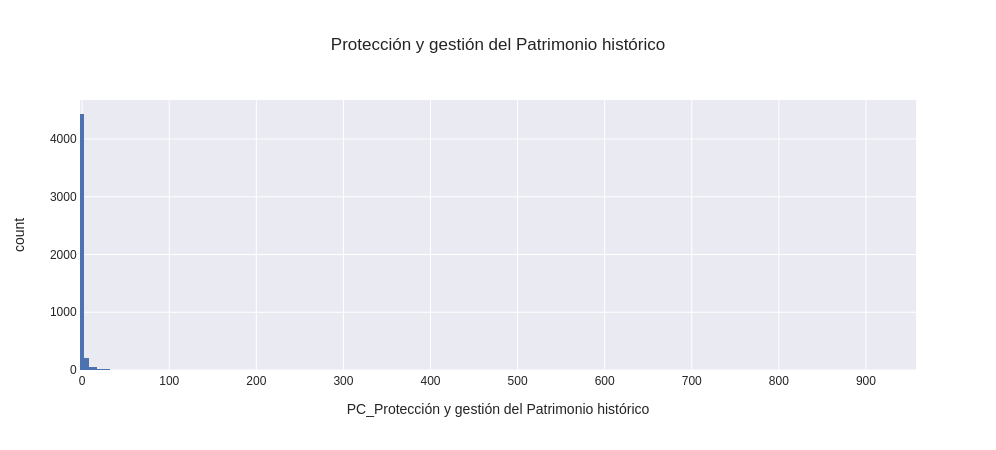

In [17]:
OB=df_final_pob.columns[42]

fig=px.histogram(df_final_pob, x=f'PC_{OB}',nbins=400,template='seaborn',title=f'{OB}',barmode='group')
fig.show()

In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 0)



yea=df_final_pob[['CCAA', 'Provincia','Nombre Ente Principal','Código Ente Principal','Población 2018',
              'TOTAL', 'PC_TOTAL',OB,f'PC_{OB}']].sort_values(by=f'PC_{OB}', ascending=False).head(10).T
yea

,2367,971,1041,1018,1022,2904,911,979,2571,3139
CCAA,Castilla y León,Aragón,Aragón,Aragón,Aragón,Cataluña,Aragón,Aragón,Castilla-La Mancha,Cataluña
Provincia,Valladolid,Zaragoza,Zaragoza,Zaragoza,Zaragoza,Barcelona,Zaragoza,Zaragoza,Albacete,Girona
Nombre Ente Principal,Puras,Embid de Ariza,Orera,Mianos,Monterde,Figaró-Montmany,Aldehuela de Liestos,Fayos (Los),Riópar,Pontós
Código Ente Principal,07-47-126-AA-000,02-50-096-AA-000,02-50-196-AA-000,02-50-168-AA-000,02-50-173-AA-000,09-08-134-AA-000,02-50-016-AA-000,02-50-106-AA-000,08-02-067-AA-000,09-17-136-AA-000
Población 2018,48,36,118,32,159,1109,49,141,1357,247
TOTAL,89763.8,73726.3,216720,131565,152288,662163,116767,317107,1.53156e+06,305042
PC_TOTAL,1870.08,2047.95,1836.61,4111.41,957.785,597.081,2382.99,2248.99,1128.64,1234.99
Protección y gestión del Patrimonio histórico,45822.7,33977,59365.8,12652.2,60495,347782,14055.4,30049.8,247663,36553.3
PC_Protección y gestión del Patrimonio histórico,954.64,943.806,503.1,395.38,380.472,313.6,286.845,213.119,182.508,147.989


In [19]:


# pd.set_option('display.max_columns', None)

# df_final_pob.loc[(df_final_pob['Población 2018']>11000)&(df_final_pob['Población 2018']<11200)]

In [20]:
df_indicadores_pob.loc[(df_indicadores_pob['Código Ente Principal']==yea.iloc[3,0])&(df_indicadores_pob['Descripción']==OB)]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades,codigoM,Población 2018,CCAA,codigo_geo
252076,Valladolid,07-47-126-AA-000,Ayuntamiento,Puras,Protección y gestión del Patrimonio histórico,Nº personas en plantilla adscritas al servicio,0.01,47126,48.0,Castilla y León,47126
252077,Valladolid,07-47-126-AA-000,Ayuntamiento,Puras,Protección y gestión del Patrimonio histórico,Nº bienes culturales protegidos,0.01,47126,48.0,Castilla y León,47126


# MELT

In [21]:
pd.set_option('display.max_rows', 0)
vars_melt=df_final_pob.columns[0:5].to_list()+df_final_pob.columns[95:96].to_list()+df_final_pob.columns[96:97].to_list()


df_final_pob_melt=pd.melt(df_final_pob, id_vars=vars_melt,value_vars=df_final_pob.columns[5:48],
        var_name='Descripción',value_name='coste_efectivo')



df_final_pob_melt.to_parquet('../data/processed/df_final_pob_melt.parquet')

print(df_final_pob_melt['coste_efectivo'].sum())
print(28641291941.31)

df_final_pob_melt



28641291941.31
28641291941.31


,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,codigo_geo,Descripción,coste_efectivo
0,Andalucía,Almería,Ayuntamiento,Abla,01-04-001-AA-000,1.000-2.000,4001,Abastecimiento de agua potable,282928.39
1,Andalucía,Almería,Ayuntamiento,Abrucena,01-04-002-AA-000,1.000-2.000,4002,Abastecimiento de agua potable,77227.64
2,Andalucía,Almería,Ayuntamiento,Adra,01-04-003-AA-000,20.000-50.000,4003,Abastecimiento de agua potable,1255574.16
3,Andalucía,Almería,Ayuntamiento,Albánchez,01-04-004-AA-000,0-1.000,4004,Abastecimiento de agua potable,60828.11
4,Andalucía,Almería,Ayuntamiento,Alboloduy,01-04-005-AA-000,0-1.000,4005,Abastecimiento de agua potable,157266.48
5,Andalucía,Almería,Ayuntamiento,Albox,01-04-006-AA-000,10.000-20.000,4006,Abastecimiento de agua potable,0.00
6,Andalucía,Almería,Ayuntamiento,Alcolea,01-04-007-AA-000,0-1.000,4007,Abastecimiento de agua potable,61945.05
7,Andalucía,Almería,Ayuntamiento,Alcóntar,01-04-008-AA-000,0-1.000,4008,Abastecimiento de agua potable,50007.27
8,Andalucía,Almería,Ayuntamiento,Alcudia de Monteagud,01-04-009-AA-000,0-1.000,4009,Abastecimiento de agua potable,36579.39
...,...,...,...,...,...,...,...,...,...


In [22]:
pd.set_option('display.max_rows', 0)
vars_melt=df_final_pob.columns[0:5].to_list()+df_final_pob.columns[95:96].to_list()+df_final_pob.columns[96:97].to_list()


df_final_pob_melt_PC=pd.melt(df_final_pob, id_vars=vars_melt,value_vars=df_final_pob.columns[51:94].to_list(),
        var_name='Descripción',value_name='coste_efectivo_PC')

df_pob_melt_PC=df_final_pob[['Código Ente Principal','Población 2018']]

df_final_pob_melt_PC = pd.merge(df_final_pob_melt_PC, df_pob_melt_PC, on='Código Ente Principal', how='left')


df_final_pob_melt_PC.to_parquet('../data/processed/df_final_pob_melt_PC.parquet')

print(df_final_pob_melt_PC['coste_efectivo_PC'].sum())
print(2793076.4291718914)

df_final_pob_melt_PC

2793076.4291718914
2793076.4291718914


,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,codigo_geo,Descripción,coste_efectivo_PC,Población 2018
0,Andalucía,Almería,Ayuntamiento,Abla,01-04-001-AA-000,1.000-2.000,4001,PC_Abastecimiento de agua potable,229.091814,1235.0
1,Andalucía,Almería,Ayuntamiento,Abrucena,01-04-002-AA-000,1.000-2.000,4002,PC_Abastecimiento de agua potable,67.154470,1150.0
2,Andalucía,Almería,Ayuntamiento,Adra,01-04-003-AA-000,20.000-50.000,4003,PC_Abastecimiento de agua potable,50.507831,24859.0
3,Andalucía,Almería,Ayuntamiento,Albánchez,01-04-004-AA-000,0-1.000,4004,PC_Abastecimiento de agua potable,80.781023,753.0
4,Andalucía,Almería,Ayuntamiento,Alboloduy,01-04-005-AA-000,0-1.000,4005,PC_Abastecimiento de agua potable,253.247150,621.0
5,Andalucía,Almería,Ayuntamiento,Albox,01-04-006-AA-000,10.000-20.000,4006,PC_Abastecimiento de agua potable,0.000000,11696.0
6,Andalucía,Almería,Ayuntamiento,Alcolea,01-04-007-AA-000,0-1.000,4007,PC_Abastecimiento de agua potable,76.099570,814.0
7,Andalucía,Almería,Ayuntamiento,Alcóntar,01-04-008-AA-000,0-1.000,4008,PC_Abastecimiento de agua potable,94.710739,528.0
8,Andalucía,Almería,Ayuntamiento,Alcudia de Monteagud,01-04-009-AA-000,0-1.000,4009,PC_Abastecimiento de agua potable,270.958444,135.0
...,...,...,...,...,...,...,...,...,...,...


In [23]:
columns_total=df_final_pob.columns[5:48].to_list()

print(len(columns_total))

columns_pc=df_final_pob.columns[51:94].to_list()
print(len(columns_pc))

43
43


# Mapa

In [24]:
CCAA_CO = pd.read_csv('../data/raw/comunidades-autonomas-espanolas.csv', sep=';')

CCAA_CO['LAT']=CCAA_CO['Geo Point']
CCAA_CO['LON']=CCAA_CO['Geo Point']
CCAA_CO['CCAA']=CCAA_CO['Comunidade Autónoma']

CCAA_CO['LAT'] = CCAA_CO['LAT'].str.replace(r',.*', '')
CCAA_CO['LON'] = CCAA_CO['LON'].str.replace(r'.*,', '')

CCAA_CO.loc[CCAA_CO['Codigo']==1,'CCAA']='Andalucía'
CCAA_CO.loc[CCAA_CO['Codigo']==2,'CCAA']='Aragón'
CCAA_CO.loc[CCAA_CO['Codigo']==3,'CCAA']='Principado de Asturias'
CCAA_CO.loc[CCAA_CO['Codigo']==4,'CCAA']='Illes Balears'
CCAA_CO.loc[CCAA_CO['Codigo']==5,'CCAA']='Canarias'
CCAA_CO.loc[CCAA_CO['Codigo']==6,'CCAA']='Cantabria'
CCAA_CO.loc[CCAA_CO['Codigo']==7,'CCAA']='Castilla y León'
CCAA_CO.loc[CCAA_CO['Codigo']==8,'CCAA']='Castilla-La Mancha'
CCAA_CO.loc[CCAA_CO['Codigo']==9,'CCAA']='Cataluña'
CCAA_CO.loc[CCAA_CO['Codigo']==11,'CCAA']='Extremadura'
CCAA_CO.loc[CCAA_CO['Codigo']==12,'CCAA']='Galicia'
CCAA_CO.loc[CCAA_CO['Codigo']==13,'CCAA']='Comunidad de Madrid'
CCAA_CO.loc[CCAA_CO['Codigo']==14,'CCAA']='Región de Murcia'
CCAA_CO.loc[CCAA_CO['Codigo']==17,'CCAA']='La Rioja'
CCAA_CO.loc[CCAA_CO['Codigo']==10,'CCAA']='Comunitat Valenciana'

CCAA_CO['LAT'] = CCAA_CO['LAT'].astype('float64')
CCAA_CO['LON'] = CCAA_CO['LON'].astype('float64')

CCAA_CO.to_parquet('../data/processed/CCAA_CO.parquet')


In [25]:
MUNI_CO = pd.read_excel('../data/raw/MUNICIPIOS.xlsx')

MUNI_CO['codigo_geo']=MUNI_CO['CODIGO']
MUNI_CO=MUNI_CO[['codigo_geo', 'LONGITUD_ETRS89', 'LATITUD_ETRS89']]

df_muni_co=df_final_pob[['Provincia','Nombre Ente Principal','codigo_geo']]
df_muni_co['codigo_geo'] = df_muni_co['codigo_geo'].astype('int64')

MUNI_CO = pd.merge(df_muni_co, MUNI_CO, on='codigo_geo', how='left')

MUNI_CO.rename(columns={'LONGITUD_ETRS89': 'LON', 'LATITUD_ETRS89': 'LAT'},inplace=True)





MUNI_CO.to_parquet('../data/processed/MUNI_CO.parquet')



/home/carpiero/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
Filtro_PROV=(MUNI_CO['Nombre Ente Principal']=='Barcelona')|(MUNI_CO['Nombre Ente Principal']=='Madrid')|\
(MUNI_CO['Nombre Ente Principal']=='Vigo')|(MUNI_CO['Nombre Ente Principal']=='Santiago de Compostela')|\
(MUNI_CO['Nombre Ente Principal']=='Lugo')|(MUNI_CO['Nombre Ente Principal']=='Maceda')|\
(MUNI_CO['Nombre Ente Principal']=='Oviedo')|(MUNI_CO['Nombre Ente Principal']=='Santander')|\
(MUNI_CO['Nombre Ente Principal']=='León')|(MUNI_CO['Nombre Ente Principal']=='Palencia')|\
(MUNI_CO['Nombre Ente Principal']=='Burgos')|(MUNI_CO['Nombre Ente Principal']=='Soria')|\
(MUNI_CO['Nombre Ente Principal']=='Valladolid')|(MUNI_CO['Nombre Ente Principal']=='Zamora')|\
(MUNI_CO['Nombre Ente Principal']=='Segovia')|(MUNI_CO['Nombre Ente Principal']=='Ávila')|\
(MUNI_CO['Nombre Ente Principal']=='Salamanca')|(MUNI_CO['Nombre Ente Principal']=='Barcelona')|\
(MUNI_CO['Nombre Ente Principal']=='Logroño')|(MUNI_CO['Nombre Ente Principal']=='Huesca')|\
(MUNI_CO['Nombre Ente Principal']=='Zaragoza')|(MUNI_CO['Nombre Ente Principal']=='Teruel')|\
(MUNI_CO['Nombre Ente Principal']=='Girona')|(MUNI_CO['Nombre Ente Principal']=='Tarragona')|\
(MUNI_CO['Nombre Ente Principal']=='Lleida')|(MUNI_CO['Nombre Ente Principal']=='Barcelona')|\
(MUNI_CO['Nombre Ente Principal']=='Fuentelviejo')|(MUNI_CO['Nombre Ente Principal']=='Cuenca')|\
(MUNI_CO['Nombre Ente Principal']=='Toledo')|(MUNI_CO['Nombre Ente Principal']=='Albacete')|\
(MUNI_CO['Nombre Ente Principal']=='Ciudad Real')|(MUNI_CO['Nombre Ente Principal']=='Huelva')|\
(MUNI_CO['Nombre Ente Principal']=='Murcia')|(MUNI_CO['Nombre Ente Principal']=='Cáceres')|\
(MUNI_CO['Nombre Ente Principal']=='Almendralejo')|(MUNI_CO['Nombre Ente Principal']=='Sevilla')|\
(MUNI_CO['Nombre Ente Principal']=='Espera')|(MUNI_CO['Nombre Ente Principal']=='Jaén')|\
(MUNI_CO['Nombre Ente Principal']=='Córdoba')|(MUNI_CO['Nombre Ente Principal']=='Almería')|\
(MUNI_CO['Nombre Ente Principal']=='Málaga')|(MUNI_CO['Nombre Ente Principal']=='Granada')|\
(MUNI_CO['Nombre Ente Principal']=='Agost')|(MUNI_CO['Nombre Ente Principal']=='València')|\
(MUNI_CO['Nombre Ente Principal']=='Castelló de la Plana')|(MUNI_CO['Nombre Ente Principal']=='Petra')

PROV_CO=MUNI_CO.loc[Filtro_PROV]

PROV_CO.to_parquet('../data/processed/PROV_CO.parquet')





# PRUEBAS

In [27]:
5

5

In [12]:
    
    
cohorte='0-1000'
partida_de_coste_types='Abastecimiento domiciliario de agua potable'
    
lista=[]
for x in columns_total:
    y= df_final_pob_melt.loc[(df_final_pob_melt['cohorte_pob'] == cohorte) & (df_final_pob_melt['Descripción'] == x),'coste_efectivo'].sum()/df_final_pob.loc[df_final_pob['cohorte_pob'] == cohorte , 'Población 2018'].sum()
    lista.append(round(y,2))


lista

[70.03,
 0.68,
 17.63,
 3.81,
 11.76,
 64.99,
 4.41,
 7.84,
 0.25,
 6.37,
 17.41,
 1.28,
 7.25,
 6.5,
 2.96,
 5.96,
 35.23,
 6.82,
 11.72,
 25.25,
 26.28,
 1.68,
 1.42,
 7.01,
 42.82,
 13.41,
 0.21,
 55.87,
 3.63,
 1.13,
 23.59,
 2.59,
 6.0,
 0.45,
 0.64,
 0.85,
 1.26,
 1.7,
 19.17,
 0.47,
 2.42,
 0.37,
 18.22]

In [13]:
partida_de_coste_types='PC_Abastecimiento domiciliario de agua potable'


lista2=[]
for x in columns_pc:
    y=np.median(df_final_pob_melt_PC.loc[(df_final_pob_melt_PC['cohorte_pob'] == cohorte) & (df_final_pob_melt_PC['Descripción'] == x) & (df_final_pob_melt_PC['coste_efectivo_PC']>0), 'coste_efectivo_PC'])
    lista2.append(round(y,2)) 
    
lista2



[62.28,
 3.98,
 6.48,
 1.01,
 7.82,
 59.33,
 9.51,
 3.83,
 2.18,
 25.76,
 19.85,
 8.04,
 11.02,
 4.35,
 20.18,
 17.98,
 47.96,
 12.5,
 21.14,
 25.54,
 18.69,
 8.31,
 14.63,
 13.24,
 38.71,
 13.22,
 4.66,
 28.01,
 36.6,
 3.92,
 33.67,
 20.03,
 11.63,
 5.42,
 5.52,
 6.89,
 4.89,
 7.53,
 43.46,
 14.24,
 15.68,
 3.56,
 24.35]

In [14]:
df_final_pob_melt_PC.loc[(df_final_pob_melt['Nombre Ente Principal']=='Lugo')]

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo_PC
3995,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Abastecimiento de agua potable,33.524107
8864,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,"PC_Abastos, mercados, lonjas",1.498495
13733,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Acceso a los núcleos de población,0.000000
18602,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Actividades funerarias,3.349011
23471,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Alcantarillado,29.978559
28340,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Alumbrado público,37.020919
33209,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Biblioteca pública,2.623337
38078,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Cementerio,3.348384
42947,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Comercio ambulante,0.000000
...,...,...,...,...,...,...,...,...


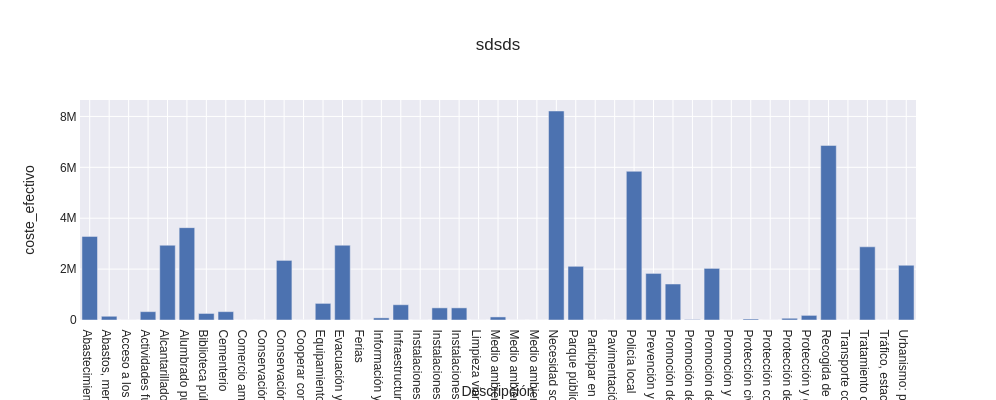

In [15]:
graph=df_final_pob_melt.loc[(df_final_pob_melt['Nombre Ente Principal']=='Lugo')]


fig=px.bar(graph,x='Descripción', y='coste_efectivo',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

/home/carpiero/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



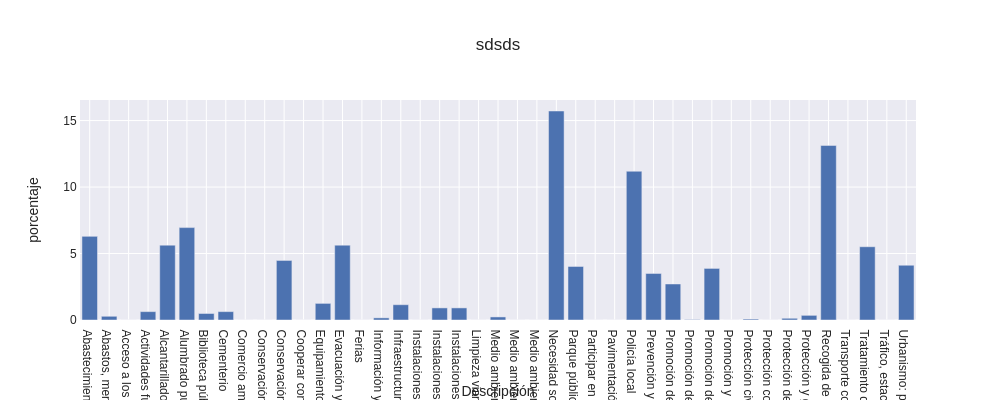

In [16]:
def porcentaje(df):
    df['porcentaje']=df.apply(lambda new: round(new['coste_efectivo']/df['coste_efectivo'].sum()*100,2), axis=1)
    return df

graph_porc=porcentaje(graph)


fig=px.bar(graph_porc,x='Descripción', y='porcentaje',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

In [17]:
df_indicadores.loc[(df_indicadores['Nombre Ente Principal']=='Lugo')&(df_indicadores['Descripción']=='Policía local')]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
5472,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,117.0
5473,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,25.0
5514,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,0.0
5515,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,0.0


# MEAN

In [18]:
df_final_pob.describe().T

,count,mean,std,min,25%,50%,75%,max
Abastecimiento de agua potable,4869.0,354777.251010,2.108914e+06,0.0,1263.460000,17924.200000,87548.220000,5.213138e+07
"Abastos, mercados, lonjas",4869.0,33926.290115,6.364999e+05,0.0,0.000000,0.000000,0.000000,2.990401e+07
Acceso a los núcleos de población,4869.0,37771.049793,2.062460e+05,0.0,0.000000,1.000000,8794.100000,7.428429e+06
Actividades funerarias,4869.0,26235.939191,4.698905e+05,0.0,0.000000,1.000000,1603.330000,2.909213e+07
Alcantarillado,4869.0,101223.892672,7.949925e+05,0.0,0.000000,1641.240000,14000.000000,2.987615e+07
Alumbrado público,4869.0,236204.862035,1.547620e+06,0.0,11813.620000,38702.770000,139051.480000,8.605973e+07
Biblioteca pública,4869.0,62466.948636,4.687014e+05,0.0,0.000000,0.000000,24137.470000,2.736592e+07
Cementerio,4869.0,37982.991489,4.188734e+05,0.0,0.010000,1201.350000,10323.040000,1.840672e+07
Comercio ambulante,4869.0,2916.237149,3.412904e+04,0.0,0.000000,0.000000,0.000000,1.721658e+06
...,...,...,...,...,...,...,...,...


In [19]:
columns_total=df_final_pob.columns[5:48].to_list()+df_final_pob.columns[50:51].to_list()

print(len(columns_total))

columns_pc=df_final_pob.columns[51:94].to_list()
print(len(columns_pc))
columns_pc

44
43


['PC_Abastecimiento de agua potable',
 'PC_Abastos, mercados, lonjas ',
 'PC_Acceso a los núcleos de población',
 'PC_Actividades funerarias',
 'PC_Alcantarillado',
 'PC_Alumbrado público',
 'PC_Biblioteca pública',
 'PC_Cementerio',
 'PC_Comercio ambulante',
 'PC_Conservación y rehabilitación de la edificación',
 'PC_Conservación, mantenimiento y vigilancia de los edificios destinados a educación',
 'PC_Cooperar con las Administraciones educativas en la obtención de solares',
 'PC_Equipamientos culturales',
 'PC_Evacuación y tratamiento de aguas residuales',
 'PC_Ferias ',
 'PC_Información y promoción de la actividad turística de interés y ámbito local',
 'PC_Infraestructura viaria y otros equipamientos de titularidad de la entidad local',
 'PC_Instalaciones de ocupación del tiempo libre',
 'PC_Instalaciones deportivas',
 'PC_Instalaciones deportivas de uso público',
 'PC_Limpieza viaria',
 'PC_Medio ambiente urbano',
 'PC_Medio ambiente urbano: Gestión de los residuos sólidos urbanos

In [42]:
rs = RobustScaler()
# X = pd.DataFrame(rs.fit_transform(X), columns= X.columns)
rs.fit(df_final_pob[columns_pc])

rs.center_


array([3.97074060e+01, 0.00000000e+00, 3.07692308e-03, 2.05338809e-03,
       3.07793123e+00, 4.23548893e+01, 0.00000000e+00, 1.83266936e+00,
       0.00000000e+00, 0.00000000e+00, 8.62068966e-01, 0.00000000e+00,
       0.00000000e+00, 3.22580645e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.13496933e+00,
       1.33668531e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.71146251e+00, 0.00000000e+00, 1.70345522e+01,
       0.00000000e+00, 0.00000000e+00, 6.45090361e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.53261795e+00])

In [43]:
df_final_pob.describe().T['mean'].to_list()

[354777.25101047446,
 33926.29011501335,
 37771.04979256521,
 26235.939190798934,
 101223.89267200656,
 236204.86203532552,
 62466.94863627029,
 37982.991489012114,
 2916.2371493119736,
 39623.87046621483,
 227931.67427397822,
 13763.580833846785,
 72247.9864243171,
 80167.32603409325,
 16651.106611213803,
 53235.42897104128,
 79574.81684534812,
 44695.855436434584,
 94308.8426370918,
 249114.1546149107,
 394984.0092483056,
 23407.371825836926,
 33301.493499691926,
 97041.9496878209,
 670175.2627808584,
 205142.67906346274,
 11425.990825631547,
 227932.20094886015,
 621589.239502978,
 117144.63383240912,
 183082.2330149928,
 31549.076705689058,
 121339.45160813308,
 49821.18379544054,
 29847.317406038204,
 12485.767286917231,
 44512.11248716369,
 19318.88000821524,
 344085.1915896488,
 316856.1992154447,
 102778.63538919696,
 133638.1079995892,
 226097.5637050729,
 8087.2483056069,
 5882376.656666666,
 66.4742401756412,
 0.8827538328700139,
 14.906496911589368,
 3.562335291032662,
 11.

In [44]:
df=df_final_pob_melt

well_statuses=['Aragón','Andalucía','La Rioja']
well_types=['Zaragoza','Córdoba']
municipio_types=['Torrellas','Palma del Río']
partida_de_coste_types=['Actividades funerarias','Biblioteca pública']

df[df["CCAA"].isin(well_statuses)
        & df['Provincia'].isin(well_types)
        & df['Nombre Ente Principal'].isin(municipio_types)
        & df['Descripción'].isin(partida_de_coste_types)]

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo
14782,Andalucía,Córdoba,Ayuntamiento,Palma del Río,01-14-049-AA-000,20000-50000,Actividades funerarias,4507477.74
15693,Aragón,Zaragoza,Ayuntamiento,Torrellas,02-50-261-AA-000,0-1000,Actividades funerarias,122492.81
29389,Andalucía,Córdoba,Ayuntamiento,Palma del Río,01-14-049-AA-000,20000-50000,Biblioteca pública,113611.81
30300,Aragón,Zaragoza,Ayuntamiento,Torrellas,02-50-261-AA-000,0-1000,Biblioteca pública,0.00


In [45]:

dff=df[df["CCAA"].isin(well_statuses)
        & df['Provincia'].isin(well_types)
        & df['Nombre Ente Principal'].isin(municipio_types)
        & df['Descripción'].isin(partida_de_coste_types)]


dff["coste_efectivo"].values

array([4507477.74,  122492.81,  113611.81,       0.  ])

In [46]:
CCAA=sorted(df_final_pob['CCAA'].unique().to_list())
CCAA.insert(0, 'TODAS')


CCAA_dict = dict(zip(CCAA, CCAA))

CCAA_dict


{'TODAS': 'TODAS',
 'Andalucía': 'Andalucía',
 'Aragón': 'Aragón',
 'Canarias': 'Canarias',
 'Cantabria': 'Cantabria',
 'Castilla y León': 'Castilla y León',
 'Castilla-La Mancha': 'Castilla-La Mancha',
 'Cataluña': 'Cataluña',
 'Comunidad de Madrid': 'Comunidad de Madrid',
 'Comunitat Valenciana': 'Comunitat Valenciana',
 'Extremadura': 'Extremadura',
 'Galicia': 'Galicia',
 'Illes Balears': 'Illes Balears',
 'La Rioja': 'La Rioja',
 'Principado de Asturias': 'Principado de Asturias',
 'Región de Murcia': 'Región de Murcia'}

In [47]:
list(CCAA_dict.keys())[0]

'TODAS'

In [48]:
prov=sorted(df_final_pob['Provincia'].unique().to_list())
prov.insert(0, 'TODAS')
PROV = dict(zip(prov, prov))

CCAA_options = [ {"label": CCAA_dict[x], "value": x}for x in CCAA_dict]

PROV_type_options = [ {"label": PROV[x], "value":x}for x in PROV ]

In [49]:
pd.set_option('display.max_rows', 0)

CCAA_types = 'Cantabria'

if CCAA_types =='TODAS':
    value=list(PROV.keys())[0]
    options=PROV_type_options
else:
    
    prov_def=sorted(df_final_pob_melt.loc[df_final_pob_melt['CCAA']==CCAA_types,'Provincia'].unique().to_list())
    prov_def.insert(0, 'TODAS')
    PROV_def = dict(zip(prov_def, prov_def))
    PROV_def_type_options = [ {"label": PROV_def[x], "value":x}for x in PROV_def ]
    value=list(PROV_def.keys())[0]



PROV_def_type_options



[{'label': 'TODAS', 'value': 'TODAS'},
 {'label': 'Cantabria', 'value': 'Cantabria'}]

In [50]:
print(value)
options

TODAS


NameError: name 'options' is not defined

In [51]:
df_final_pob_melt.loc[(df_final_pob_melt['CCAA']=='Canarias') & (df_final_pob_melt['coste_efectivo']>100),'Descripción'].unique().shape

(43,)

In [52]:
df_final_pob_melt['coste_efectivo'].sum()

28641291941.31

In [53]:
df_final_pob['PC_TOTAL'].sum()

2793076.429171892

In [54]:
df_final_pob['Población 2018'].sum()

39376812.0

In [55]:
df_final_pob_melt['coste_efectivo'].sum()/df_final_pob['Población 2018'].sum()

727.3644179551661

In [56]:
df_final_pob.loc[df_final_pob['CCAA'] == CCAA_types,'Población 2018'].sum()

567465.0

In [57]:
Población_text='727 hab.'



pob=int(''.join(re.findall(r'\d' , Población_text)))

pob

727

In [58]:
municipio_types= 'Madrid'

juan=df_final_pob_melt.loc[df_final_pob_melt['Nombre Ente Principal'] == municipio_types , 'cohorte_pob'].unique().to_list()[0]

In [59]:
df_final_pob_melt.loc[df_final_pob_melt['cohorte_pob'] == juan ]

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo
548,Andalucía,Málaga,Ayuntamiento,Málaga,01-29-067-AA-000,500000-5000000,Abastecimiento de agua potable,4.110684e+07
645,Andalucía,Sevilla,Ayuntamiento,Sevilla,01-41-091-AA-000,500000-5000000,Abastecimiento de agua potable,4.233650e+07
1115,Aragón,Zaragoza,Ayuntamiento,Zaragoza,02-50-297-AA-000,500000-5000000,Abastecimiento de agua potable,2.611428e+07
2825,Cataluña,Barcelona,Ayuntamiento,Barcelona,09-08-019-AA-000,500000-5000000,Abastecimiento de agua potable,7.893861e+06
4186,Comunidad de Madrid,Madrid,Ayuntamiento,Madrid,12-28-079-AA-000,500000-5000000,Abastecimiento de agua potable,2.941334e+07
4854,Comunitat Valenciana,Valencia / València,Ayuntamiento,València,17-46-250-AA-000,500000-5000000,Abastecimiento de agua potable,1.722048e+07
5417,Andalucía,Málaga,Ayuntamiento,Málaga,01-29-067-AA-000,500000-5000000,"Abastos, mercados, lonjas",1.523297e+06
5514,Andalucía,Sevilla,Ayuntamiento,Sevilla,01-41-091-AA-000,500000-5000000,"Abastos, mercados, lonjas",5.307434e+06
5984,Aragón,Zaragoza,Ayuntamiento,Zaragoza,02-50-297-AA-000,500000-5000000,"Abastos, mercados, lonjas",3.158866e+06
...,...,...,...,...,...,...,...,...


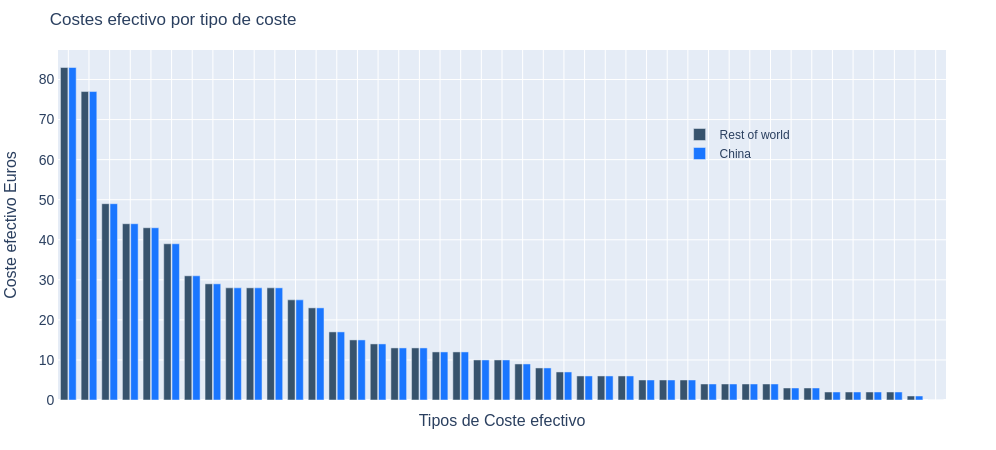

In [182]:
# graph = df_final_pob_melt.loc[(df_final_pob_melt['Nombre Ente Principal'] == municipio_types)]



df=df_final_pob_melt.pivot_table(index=['Descripción'],values=['coste_efectivo'],aggfunc=sum).sort_values(by='coste_efectivo',ascending=False).reset_index()
div=df_final_pob['Población 2018'].sum()
df['coste_efectivo_new']=df.apply(lambda new: round(new['coste_efectivo']/div,0), axis=1)

fig = go.Figure()
fig.add_trace(go.Bar(x=df['Descripción'] ,
                     y=df['coste_efectivo_new'] ,
                     name='Rest of world' ,
                     marker_color='rgb(55, 83, 109)'
                     ))
fig.add_trace(go.Bar(x=df['Descripción'] ,
                     y=df['coste_efectivo_new'],
                     name='China' ,
                     marker_color='rgb(26, 118, 255)'
                     ))



fig.update_layout(margin=dict(l=20,r=50,t=50,b=50),
title='Costes efectivo por tipo de coste' ,
xaxis_tickfont_size=12 ,
xaxis_tickangle=-45,
yaxis=dict(
    title='Coste efectivo Euros' ,
    titlefont_size=16 ,
    tickfont_size=14 ,
) ,
xaxis=dict(
    title='Tipos de Coste efectivo' ,
    titlefont_size=16 ,
    tickfont_size=14 ,showticklabels=False,
) ,                  

legend=dict(
    x=0.7 ,
    y=0.8 ,
    bgcolor='rgba(255, 255, 255, 0)' ,
    bordercolor='rgba(255, 255, 255, 0)'
) ,
barmode='group' ,
bargap=0.20 ,  # gap between bars of adjacent location coordinates.
bargroupgap=0.1  # gap between bars of the same location coordinate.
)


fig.show()

In [ ]:
df_final_pob_melt['Descripción']

In [187]:
PROV_types='Soria'

In [189]:
PROV_types='Soria'

df=df_final_pob_melt.pivot_table(index=['Provincia','Descripción'],values=['coste_efectivo'],aggfunc=sum).sort_values(by='coste_efectivo',ascending=False).reset_index()

div=df_final_pob.loc[df_final_pob['Provincia'] == PROV_types,'Población 2018'].sum()

df=df.loc[df['Provincia'] == PROV_types]
df['coste_efectivo_new']=df.apply(lambda new: new['coste_efectivo']/div, axis=1)






df

,Provincia,Descripción,coste_efectivo
0,Barcelona,Necesidad social y atención inmediata a person...,5.904030e+08
1,Madrid,Necesidad social y atención inmediata a person...,5.716942e+08
2,Madrid,Policía local,5.683260e+08
3,Madrid,Transporte colectivo urbano de viajeros,5.647959e+08
4,Barcelona,Policía local,4.717130e+08
5,Madrid,Limpieza viaria,3.768895e+08
6,Barcelona,Limpieza viaria,3.593108e+08
7,Madrid,Instalaciones deportivas de uso público,3.183499e+08
8,Madrid,Pavimentación de las vías públicas,2.921383e+08
...,...,...,...


In [188]:
df_final_pob.loc[df_final_pob['Provincia'] == PROV_types,'Población 2018'].sum()

68670.0

In [185]:
df_final_pob.loc[df_final_pob['CCAA'] == CCAA_types,'Población 2018'].sum()

567465.0

In [194]:
municipio_types='Abades'

In [196]:
cohorte = df_final_pob_melt.loc[df_final_pob_melt['Nombre Ente Principal'] == municipio_types , 'cohorte_pob'] \
            .unique().to_list()[0]

# value = np.median(df_final_pob_melt_PC.loc[(df_final_pob_melt_PC['cohorte_pob'] == cohorte) & \
#             (df_final_pob_melt_PC['Descripción'] == f'PC_{partida_de_coste_types}') & (
#                 df_final_pob_melt_PC['coste_efectivo_PC'] > 0) , 'coste_efectivo_PC'])
    
    

In [204]:
ho=df_final_pob_melt_PC.loc[ df_final_pob_melt_PC['coste_efectivo_PC'] > 0]


ho


,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo_PC
0,Andalucía,Almería,Ayuntamiento,Abla,01-04-001-AA-000,1000-2000,PC_Abastecimiento de agua potable,229.091814
1,Andalucía,Almería,Ayuntamiento,Abrucena,01-04-002-AA-000,1000-2000,PC_Abastecimiento de agua potable,67.154470
2,Andalucía,Almería,Ayuntamiento,Adra,01-04-003-AA-000,20000-50000,PC_Abastecimiento de agua potable,50.507831
3,Andalucía,Almería,Ayuntamiento,Albánchez,01-04-004-AA-000,0-1000,PC_Abastecimiento de agua potable,80.781023
4,Andalucía,Almería,Ayuntamiento,Alboloduy,01-04-005-AA-000,0-1000,PC_Abastecimiento de agua potable,253.247150
6,Andalucía,Almería,Ayuntamiento,Alcolea,01-04-007-AA-000,0-1000,PC_Abastecimiento de agua potable,76.099570
7,Andalucía,Almería,Ayuntamiento,Alcóntar,01-04-008-AA-000,0-1000,PC_Abastecimiento de agua potable,94.710739
8,Andalucía,Almería,Ayuntamiento,Alcudia de Monteagud,01-04-009-AA-000,0-1000,PC_Abastecimiento de agua potable,270.958444
9,Andalucía,Almería,Ayuntamiento,Alhabia,01-04-010-AA-000,0-1000,PC_Abastecimiento de agua potable,32.840818
...,...,...,...,...,...,...,...,...


In [206]:
ho.pivot_table(index=['cohorte_pob','Descripción'],values=['coste_efectivo_PC'],aggfunc=np.median).reset_index()

,cohorte_pob,Descripción,coste_efectivo_PC
0,0-1000,PC_Abastecimiento de agua potable,62.277097
1,0-1000,"PC_Abastos, mercados, lonjas",3.984898
2,0-1000,PC_Acceso a los núcleos de población,6.482000
3,0-1000,PC_Actividades funerarias,1.014874
4,0-1000,PC_Alcantarillado,7.823011
5,0-1000,PC_Alumbrado público,59.326083
6,0-1000,PC_Biblioteca pública,9.514083
7,0-1000,PC_Cementerio,3.833920
8,0-1000,PC_Comercio ambulante,2.177400
...,...,...,...


In [92]:
df_final_pob.nunique()

CCAA                                                                         15
Provincia                                                                    46
Tipo Ente Principal                                                           1
Nombre Ente Principal                                                      4869
Código Ente Principal                                                      4869
Abastecimiento de agua potable                                             3744
Abastos, mercados, lonjas                                                   623
Acceso a los núcleos de población                                          2102
Actividades funerarias                                                     1860
Alcantarillado                                                             2970
Alumbrado público                                                          4696
Biblioteca pública                                                         2177
                                        

In [93]:
df_final_pob_melt.nunique()

CCAA                        15
Provincia                   46
Tipo Ente Principal          1
Nombre Ente Principal     4869
Código Ente Principal     4869
cohorte_pob                 10
Descripción                 43
coste_efectivo           67160
dtype: int64

In [94]:
df_final_pob_melt_PC.nunique()

CCAA                        15
Provincia                   46
Tipo Ente Principal          1
Nombre Ente Principal     4869
Código Ente Principal     4869
cohorte_pob                 10
Descripción                 43
coste_efectivo_PC        71624
dtype: int64

In [96]:
df_indicadores_pob.nunique()

Provincia                            46
Código Ente Principal              4869
Tipo Ente Principal                   1
Nombre Ente Principal              4869
Descripción                          43
Unidades físicas de referencia       59
Nº unidades                       34509
codigoM                            4869
Población 2018                     2867
CCAA                                 15
dtype: int64

In [20]:
df_indicadores_pob.loc[(df_indicadores_pob['Nombre Ente Principal']=='Ávila')& (df_indicadores_pob['Nº unidades']>0)\
                       & (df_indicadores_pob['Descripción']=='Transporte colectivo urbano de viajeros')]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades,codigoM,Población 2018,CCAA
159625,Avila,07-05-019-AA-000,Ayuntamiento,Ávila,Transporte colectivo urbano de viajeros,Nº total de kms de calzada de la red en trayec...,1.0,05019,57657.0,Castilla y León
159626,Avila,07-05-019-AA-000,Ayuntamiento,Ávila,Transporte colectivo urbano de viajeros,Nº total de viajeros al año,1.0,05019,57657.0,Castilla y León
159627,Avila,07-05-019-AA-000,Ayuntamiento,Ávila,Transporte colectivo urbano de viajeros,Nº total de autobuses,1.0,05019,57657.0,Castilla y León


In [21]:
pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)

go2=df_indicadores_pob.loc[(df_indicadores_pob['Nº unidades']>0)]

go=go2.pivot_table(index=['Nombre Ente Principal','Descripción'],values=['Nº unidades'],
                           aggfunc=len)

In [22]:
go.describe()

,Nº unidades
count,88684.000000
mean,1.850740
std,0.821832
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,13.000000


In [37]:
go3=go.loc[go['Nº unidades']>4].reset_index()

go3.nunique()

Nombre Ente Principal    411
Descripción               16
Nº unidades                9
dtype: int64

In [38]:
df_indicadores_pob

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades,codigoM,Población 2018,CCAA
0,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Alumbrado público,Potencia instalada,52.1,04001,1235.0,Andalucía
1,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Alumbrado público,Superficie iluminada: metros lineales,0.0,04001,1235.0,Andalucía
2,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Alumbrado público,Nº puntos de luz,651.0,04001,1235.0,Andalucía
3,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Cementerio,Superficie total del cementerio: metros cuadrados,5200.0,04001,1235.0,Andalucía
4,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Recogida de residuos,Producción anual residuos urbanos: toneladas,0.0,04001,1235.0,Andalucía
5,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Recogida de residuos,Nº contenedores,0.0,04001,1235.0,Andalucía
6,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Recogida de residuos,"Periodicidad (1 - DI, 2 - AL, 3 - SE, 4 - QU, ...",0.0,04001,1235.0,Andalucía
7,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Recogida de residuos,Kilómetros lineales del trayecto de recogida,0.0,04001,1235.0,Andalucía
8,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Limpieza viaria,Nº personas en plantilla adscritas al servicio,1.0,04001,1235.0,Andalucía
...,...,...,...,...,...,...,...,...,...,...


In [39]:
list(df_indicadores_pob.columns)

['Provincia',
 'Código Ente Principal',
 'Tipo Ente Principal',
 'Nombre Ente Principal',
 'Descripción',
 'Unidades físicas de referencia',
 'Nº unidades',
 'codigoM',
 'Población 2018',
 'CCAA']

In [43]:
list(df_indicadores_pob[['Unidades físicas de referencia','Nº unidades']].columns) 



['Unidades físicas de referencia', 'Nº unidades']

In [88]:
municipio_types='Abla'
partida_de_coste_types='Acceso a los núcleos de población'



go4=df_indicadores_pob.loc[(df_indicadores_pob['Descripción']==partida_de_coste_types)&\
                       (df_indicadores_pob['Nombre Ente Principal']==municipio_types)]

go4

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades,codigoM,Población 2018,CCAA
14,Almería,01-04-001-AA-000,Ayuntamiento,Abla,Acceso a los núcleos de población,Puntos kilométricos: P.K correspondientes al i...,0.0,04001,1235.0,Andalucía


In [81]:
go8=df_indicadores_pob.pivot_table(index=['Provincia','Descripción' , 'Unidades físicas de referencia'] ,
                                                      values=['Nº unidades'] ,
                                                      aggfunc=sum).reset_index()

In [82]:
df_indicadores_pob.loc[(df_indicadores_pob['Descripción']=='Policía local')&(df_indicadores_pob['Unidades físicas de referencia']==\
                        'Nº efectivos asignados al servicio')].sort_values(by='Nº unidades',ascending=False)

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades,codigoM,Población 2018,CCAA
440822,Madrid,12-28-079-AA-000,Ayuntamiento,Madrid,Policía local,Nº efectivos asignados al servicio,6416.0,28079,3223334.0,Comunidad de Madrid
333853,Barcelona,09-08-019-AA-000,Ayuntamiento,Barcelona,Policía local,Nº efectivos asignados al servicio,2968.0,08019,1620343.0,Cataluña
508833,Valencia / València,17-46-250-AA-000,Ayuntamiento,València,Policía local,Nº efectivos asignados al servicio,1610.0,46250,791413.0,Comunitat Valenciana
73759,Sevilla,01-41-017-AA-000,Ayuntamiento,Bormujos,Policía local,Nº efectivos asignados al servicio,1500.0,41017,21964.0,Andalucía
77203,Sevilla,01-41-091-AA-000,Ayuntamiento,Sevilla,Policía local,Nº efectivos asignados al servicio,1166.0,41091,688711.0,Andalucía
122334,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Policía local,Nº efectivos asignados al servicio,1019.0,50297,666880.0,Aragón
70651,Málaga,01-29-067-AA-000,Ayuntamiento,Málaga,Policía local,Nº efectivos asignados al servicio,892.0,29067,571026.0,Andalucía
396945,Badajoz,10-06-127-AA-000,Ayuntamiento,Talarrubias,Policía local,Nº efectivos asignados al servicio,600.0,06127,3420.0,Extremadura
145502,"Palmas, Las",05-35-016-AA-000,Ayuntamiento,Palmas de Gran Canaria (Las),Policía local,Nº efectivos asignados al servicio,574.0,35016,378517.0,Canarias
...,...,...,...,...,...,...,...,...,...,...


In [71]:
CCAA_types='Comunidad de Madrid'
df_count_c=df_final_pob.pivot_table(index=['CCAA'] ,values=['TOTAL','Población 2018'] ,aggfunc=sum).reset_index()
df_count_c['PC_TOTAL'] = df_count_c.apply(lambda new: new['TOTAL']/new['Población 2018'], axis=1)



df_count_c=df_count_c.sort_values(by='PC_TOTAL')
df_count_c=[df_count_c.head(2),df_count_c.loc[df_count_c['CCAA']==CCAA_types],df_count_c.tail(2)]
df_count_c=pd.concat(df_count_c)

df_count_c.iloc[2,0]=f'{CCAA_types}_'


df_count_c

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [44]:

pob_c=df_final_pob.pivot_table(index=['CCAA'] ,values=['Población 2018'] ,aggfunc=sum).reset_index()
df_count_c_pc=df_final_pob_melt.pivot_table(index=['CCAA','Descripción'] ,values=['coste_efectivo'] ,aggfunc=sum).reset_index()
df_count_c_pc = pd.merge(df_count_c_pc, pob_c, on='CCAA', how='left')
df_count_c_pc['PC_TOTAL'] = df_count_c_pc.apply(lambda new: round(new['coste_efectivo']/new['Población 2018'],), axis=1)




,CCAA,Descripción,coste_efectivo,Población 2018,PC_TOTAL
602,Región de Murcia,Abastecimiento de agua potable,1.517914e+08,1423404.0,107
86,Canarias,Abastecimiento de agua potable,1.523355e+08,1932728.0,79
344,Comunitat Valenciana,Abastecimiento de agua potable,2.726144e+08,4711653.0,58
129,Cantabria,Abastecimiento de agua potable,2.831676e+07,567465.0,50
430,Galicia,Abastecimiento de agua potable,1.156006e+08,2335771.0,49
0,Andalucía,Abastecimiento de agua potable,3.649560e+08,7677889.0,48
43,Aragón,Abastecimiento de agua potable,5.280455e+07,1235915.0,43
172,Castilla y León,Abastecimiento de agua potable,8.457463e+07,1947252.0,43
258,Cataluña,Abastecimiento de agua potable,3.072341e+08,7271555.0,42
215,Castilla-La Mancha,Abastecimiento de agua potable,5.491170e+07,1342565.0,41


In [48]:
df=df_count_c_pc

df=df.loc[df['Descripción']=='Abastecimiento de agua potable'].sort_values(by='PC_TOTAL',ascending=False)
df=[df.head(2),df.tail(2),df[df.shape[0]//2:(df.shape[0]//2)+1]]
df=pd.concat(df).sort_values(by='PC_TOTAL',ascending=False)
df

,CCAA,Descripción,coste_efectivo,Población 2018,PC_TOTAL
602,Región de Murcia,Abastecimiento de agua potable,1.517914e+08,1423404.0,107
86,Canarias,Abastecimiento de agua potable,1.523355e+08,1932728.0,79
172,Castilla y León,Abastecimiento de agua potable,8.457463e+07,1947252.0,43
516,La Rioja,Abastecimiento de agua potable,7.355538e+06,287682.0,26
301,Comunidad de Madrid,Abastecimiento de agua potable,4.182973e+07,6002919.0,7


In [74]:
PROV_types='Palencia'
df_count_p=df_final_pob.pivot_table(index=['Provincia'] ,values=['TOTAL','Población 2018'] ,aggfunc=sum).reset_index()
df_count_p['PC_TOTAL'] = df_count_p.apply(lambda new: new['TOTAL']/new['Población 2018'], axis=1)

df_count_p

,Provincia,Población 2018,TOTAL,PC_TOTAL
0,Albacete,303908.0,1.826232e+08,600.915974
1,Alicante / Alacant,1747366.0,1.243227e+09,711.486417
2,Almería,696959.0,4.910836e+08,704.608982
3,Asturias,987025.0,6.729865e+08,681.833261
4,Avila,136074.0,8.292578e+07,609.416793
5,Badajoz,635832.0,3.477698e+08,546.952291
6,Barcelona,5372376.0,4.113253e+09,765.630166
7,Burgos,312501.0,2.337607e+08,748.031764
8,Cantabria,567465.0,4.359858e+08,768.304361
...,...,...,...,...


In [76]:




# df_count_p=df_count_p.sort_values(by='PC_TOTAL')
# df_count_p=[df_count_p.head(2),df_count_p.loc[df_count_p['Provincia']==PROV_types],df_count_p.tail(2)]
# df_count_p=pd.concat(df_count_p)

# df_count_p.iloc[2,0]=f'{PROV_types}.'



pob_p=df_final_pob.pivot_table(index=['Provincia'] ,values=['Población 2018'] ,aggfunc=sum).reset_index()
df_count_p_pc=df_final_pob_melt.pivot_table(index=['Provincia','Descripción'] ,values=['coste_efectivo'] ,aggfunc=sum).reset_index()
df_count_p_pc = pd.merge(df_count_p_pc, pob_p, on='Provincia', how='left')
df_count_p_pc['PC_TOTAL'] = df_count_p_pc.apply(lambda new: round(new['coste_efectivo']/new['Población 2018'],), axis=1)

df = df_count_p_pc


df = df.loc[df['Descripción'] == partida_de_coste_types].sort_values(by='PC_TOTAL' , ascending=False)
df = [df.head(2) , df.loc[df['Provincia']==PROV_types], df.tail(2)]
df = pd.concat(df)
df.iloc[2,0] = f'{PROV_types}.'





df_count_p_pc

,Provincia,Descripción,coste_efectivo,Población 2018,PC_TOTAL
0,Albacete,Abastecimiento de agua potable,3.193538e+06,303908.0,11
1,Albacete,"Abastos, mercados, lonjas",1.313867e+06,303908.0,4
2,Albacete,Acceso a los núcleos de población,4.127690e+05,303908.0,1
3,Albacete,Actividades funerarias,1.174585e+06,303908.0,4
4,Albacete,Alcantarillado,2.708972e+06,303908.0,9
5,Albacete,Alumbrado público,7.523271e+06,303908.0,25
6,Albacete,Biblioteca pública,5.081383e+06,303908.0,17
7,Albacete,Cementerio,1.663417e+06,303908.0,5
8,Albacete,Comercio ambulante,9.208459e+04,303908.0,0
...,...,...,...,...,...


In [ ]:
df_count_p